## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


## Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

## hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

## Step 1: Reading & Understanding the Data

In this section the data is read and checked against missing values, duplicates and unnecessary columns. Further those are removed and data set is then used for dealing with the catagorical variables in next section.

In [3]:
# reading the data
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Insight
- The data contains 730 rows and 16 columns with non null values
- Except date column all others are float or integer type 
- Some columns such as instant, dteday donot serve any useful information as per the required model and can be removed from the dataset
- There are some fields which are categorical but are in integer/float (example: season, mnth, etc). These needs to be analyzed and then we can decide to convert them for further analysis

### Dropping columns: instant, dteday

In [100]:
df_bike=df.drop(["instant","dteday"], axis=1)

In [101]:
## Cheking for duplicate rows if any
df_bike.drop_duplicates(subset=None,inplace=True)
df_bike.shape

(730, 14)

- No duplicate entries in the dataframe

##### Cheking relationship between target column (cnt) and other columns

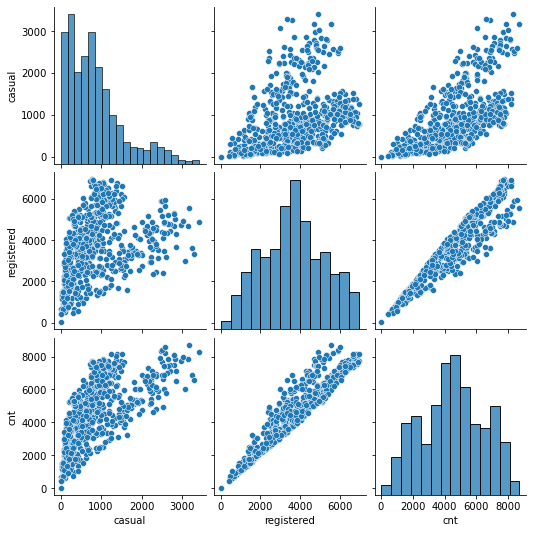

In [9]:
### Relationship between casual, registered and cnt
check1=df_bike[['casual','registered','cnt']]
sns.pairplot(check1)
plt.show()

There seems to be some strong relationship between these, since we need the cnt of bikes and not the count of different catagories, we can drop the columns of casual & registered. (As total count= casual + registered)
The check is performed below

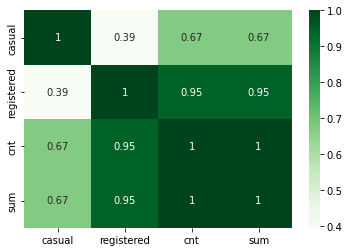

In [10]:
check1['sum']=check1['casual']+check1['registered']
sns.heatmap(check1.corr(),annot=True, cmap='Greens')
plt.show()

In [102]:
### Dropping 'casual' & 'registered'
df_bike=df_bike.drop(['casual','registered'],axis=1)
df_bike.shape

(730, 12)

### Step 2: Dealing with categorical Variables

Catagorical columns: season, mnth, weathersit, weekday needs to be converted into catagorical columns
 - mnth: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7: Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
 - weekday: 0: Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
 - season: 1:S1_Spring, 2:S2_Summer, 3:S3_Fall, 4:S4_Winter
 - weathersit: 1:Clear, 2:Misty, 3:Light_RainSnow, 4:Heavy_RainSnow

In [103]:
# Converting mnth
df_bike.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12), ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace= True)
df_bike.mnth.value_counts(normalize=True)

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [104]:
# Converting weekdays
df_bike.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df_bike.weekday.value_counts(normalize=True)

Monday       0.143836
Tuesday      0.143836
Wednesday    0.142466
Thursday     0.142466
Friday       0.142466
Saturday     0.142466
Sunday       0.142466
Name: weekday, dtype: float64

In [105]:
# Converting Season 
df_bike.season.replace((1,2,3,4), ('S1_Spring','S2_Summer','S3_Fall','S4_Winter'), inplace=True)
df_bike.season.value_counts(normalize=True)

S3_Fall      0.257534
S2_Summer    0.252055
S1_Spring    0.246575
S4_Winter    0.243836
Name: season, dtype: float64

In [106]:
#Converting weathersit
df_bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
df_bike.weathersit.value_counts(normalize=True)

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

### Step 3: Data Visualization

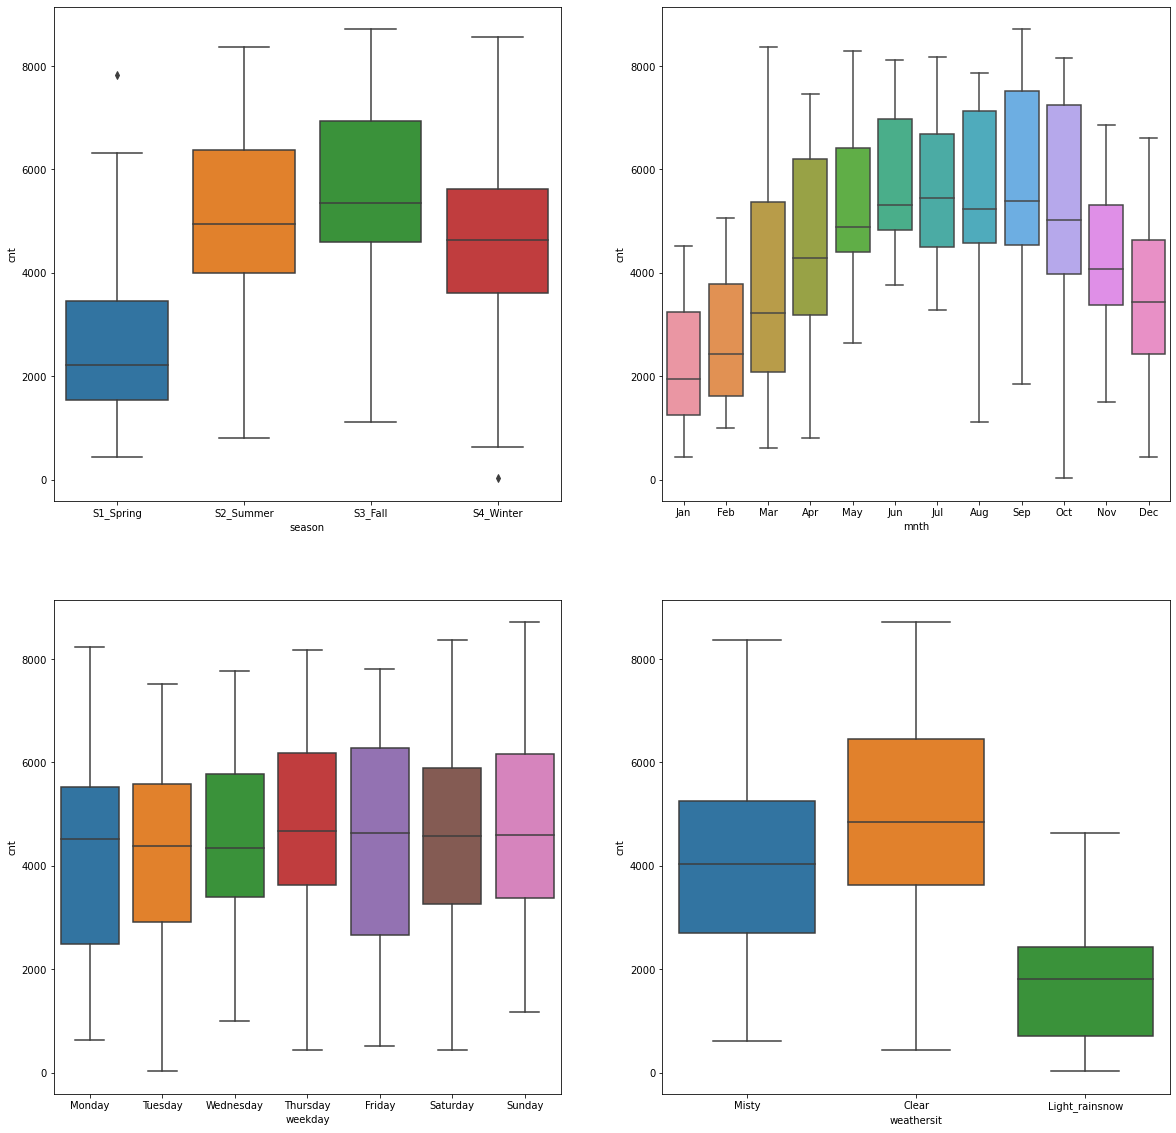

In [16]:
plt.figure(figsize=(20,20))

## Box plot of seasonal variation and count of bikes
plt.subplot(2,2,1)
sns.boxplot(x='season', y='cnt', data=df_bike)

## Box plot of month and count of bikes
plt.subplot(2,2,2)
sns.boxplot(x='mnth', y='cnt', data=df_bike)

## Box plot of weekday and count of bikes
plt.subplot(2,2,3)
sns.boxplot(x='weekday', y='cnt', data=df_bike)

## Box plot of weather situation and count of bikes
plt.subplot(2,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df_bike)

plt.show()

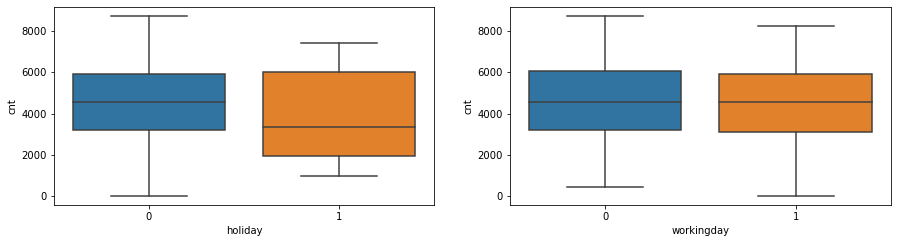

In [17]:
plt.figure(figsize=(15,8))

## Box plot of holiday and count of bikes
plt.subplot(2,2,1)
sns.boxplot(x='holiday', y='cnt', data=df_bike)

## Box plot of workingday and count of bikes
plt.subplot(2,2,2)
sns.boxplot(x='workingday', y='cnt', data=df_bike)

plt.show()

#### Catagorical variables

###### Year

In [18]:
df_yr= df_bike.groupby('yr')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
df_yr['per_sum']=df_yr['sum']/df_bike.cnt.sum()*100
df_yr['per_count']= df_yr['count']/df_bike.cnt.count()*100
df_yr=round(df_yr,2)
df_yr

,sum,mean,count,per_sum,per_count
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


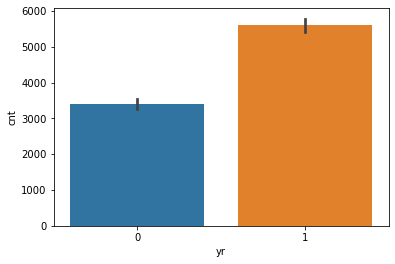

In [19]:
sns.barplot('yr', 'cnt', data=df_bike)
plt.show()

##### Insight

There is a rise in bike count over the year. In 2018 it was 37% while raised about 25% i.e upto 62% in 2019

###### Month

In [20]:
df_month= df_bike.groupby('mnth')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
df_month['per_sum']=df_month['sum']/df_bike.cnt.sum()*100
df_month['per_count']= df_month['count']/df_bike.cnt.count()*100
df_month=round(df_month,2)
df_month

,sum,mean,count,per_sum,per_count
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


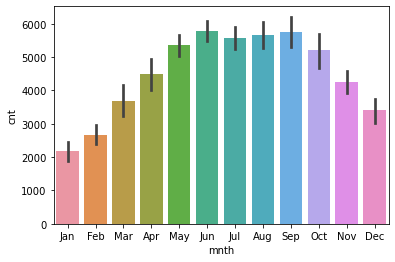

In [21]:
sns.barplot('mnth', 'cnt', data=df_bike)
plt.show()

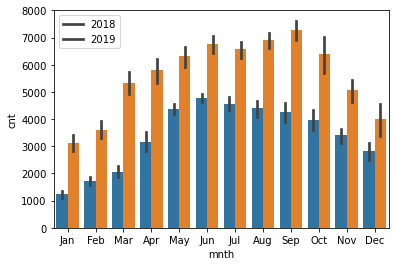

In [22]:
sns.barplot('mnth', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

###### Insight
Almost 10% of the bike booking was happening in the months' May to Sep with a median of over 4000 bookings per month. It indicates that the mnth has some trend for bookings and can be a good predictor for the dependent variable.

###### Season

In [23]:
df_season= df_bike.groupby('season')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
df_season['per_sum']=df_season['sum']/df_bike.cnt.sum()*100
df_season['per_count']= df_season['count']/df_bike.cnt.count()*100
df_season=round(df_season,2)
df_season

,sum,mean,count,per_sum,per_count
season,,,,,
S3_Fall,1061129,5644.30,188,32.24,25.75
S2_Summer,918589,4992.33,184,27.91,25.21
S4_Winter,841613,4728.16,178,25.57,24.38
S1_Spring,469514,2608.41,180,14.27,24.66


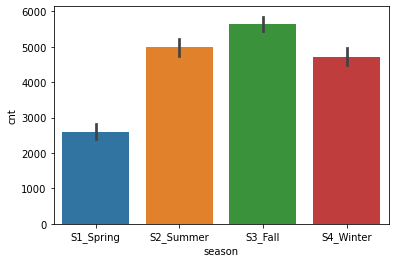

In [24]:
sns.barplot('season', 'cnt', data=df_bike)
plt.show()

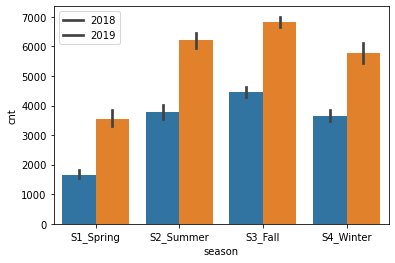

In [25]:
sns.barplot('season', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

##### Weather situaton ('weathersit')

In [26]:
df_weather= df_bike.groupby('weathersit')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
df_weather['per_sum']=df_weather['sum']/df_bike.cnt.sum()*100
df_weather['per_count']= df_weather['count']/df_bike.cnt.count()*100
df_weather=round(df_weather,2)
df_weather

,sum,mean,count,per_sum,per_count
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


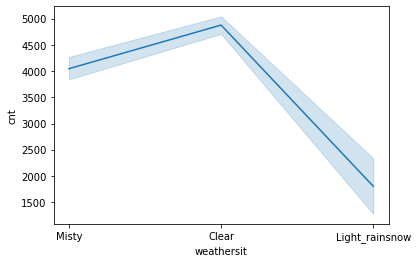

In [27]:
sns.lineplot('weathersit', 'cnt', data=df_bike)
plt.show()

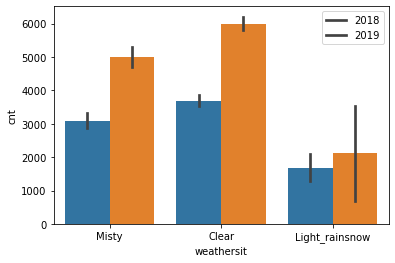

In [28]:
sns.barplot('weathersit', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

###### Insight
68.6% bike booking happened during Clear weather, followed by Misty weather of 30%. This can be a good predictor for the dependent variable

###### Weekday

In [29]:
df_week= df_bike.groupby('weekday')['cnt'].agg(['sum','mean','count']).sort_values('sum',ascending= False)
df_week['per_sum']=df_week['sum']/df_bike.cnt.sum()*100
df_week['per_count']= df_week['count']/df_bike.cnt.count()*100
df_week=round(df_week,2)
df_week

,sum,mean,count,per_sum,per_count
weekday,,,,,
Thursday,487923,4691.57,104,14.83,14.25
Sunday,485235,4665.72,104,14.74,14.25
Saturday,481176,4626.69,104,14.62,14.25
Friday,478132,4597.42,104,14.53,14.25
Wednesday,462276,4444.96,104,14.05,14.25
Tuesday,448822,4274.50,105,13.64,14.38
Monday,447281,4259.82,105,13.59,14.38


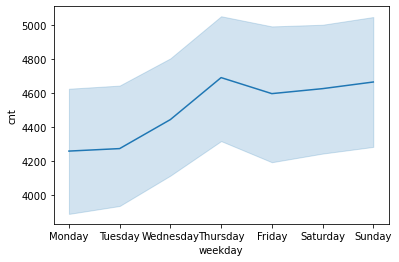

In [30]:
sns.lineplot('weekday', 'cnt', data=df_bike)
plt.show()

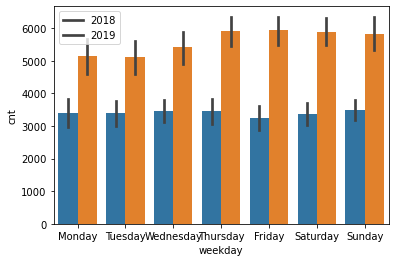

In [31]:
sns.barplot('weekday', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

##### Insights
weekday variable shows the very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. Further analysis would be needed to determine whether this attribute needs to be included in the model parameter selection

###### Holiday

In [32]:
df_holiday= df_bike.groupby('holiday')['cnt'].agg(['sum','mean']).sort_values('sum',ascending= False)
df_holiday['per_sum']=df_holiday['sum']/df_bike.cnt.sum()*100
df_holiday=round(df_holiday,2)
df_holiday

,sum,mean,per_sum
holiday,,,
0,3212410,4530.9,97.62
1,78435,3735.0,2.38


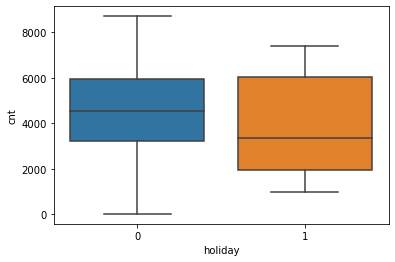

In [33]:
sns.boxplot('holiday', 'cnt', data=df_bike)
plt.show()

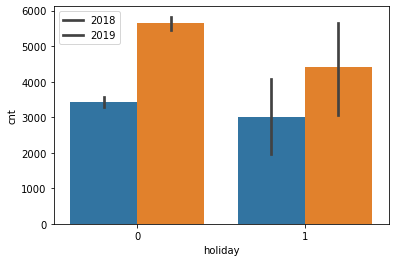

In [34]:
sns.barplot('holiday', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

###### Insight
More than 90% bike rentals happened during non- holiday period

###### Working day


In [35]:
df_work=df_bike.groupby('workingday')['cnt'].agg(['sum','mean']).sort_values('sum', ascending=False)

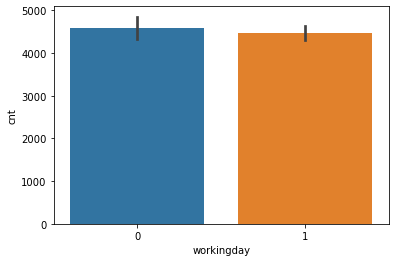

In [36]:
sns.barplot('workingday', 'cnt', data=df_bike)
plt.show()

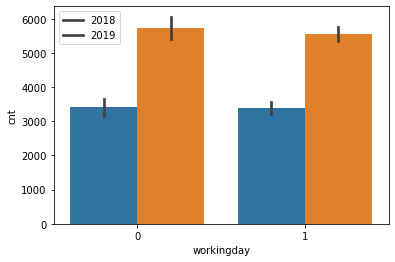

In [37]:
sns.barplot('workingday', 'cnt', hue='yr', data=df_bike)
plt.legend(labels=['2018','2019'])
plt.show()

#### Catagorical variables Interrelationship analysis

###### Variation of rental bikes across various seasons and weather

<Figure size 1080x576 with 0 Axes>

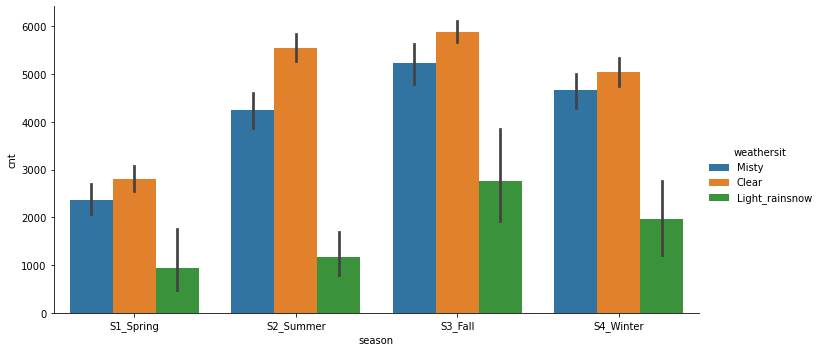

In [38]:
plt.figure(figsize=(15,8))
sns.catplot(x='season', y='cnt', hue='weathersit', data=df_bike, kind='bar', aspect=2)
plt.show()

###### Count of total rental bikes across days of week and holiday vs no holiday

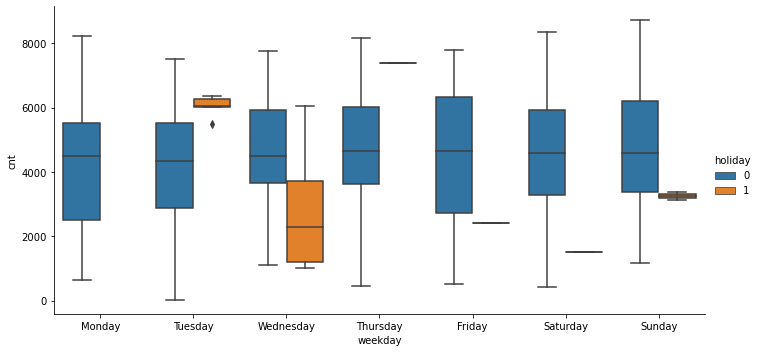

In [39]:
sns.catplot(x='weekday', y='cnt', hue='holiday', data=df_bike, kind= 'box', aspect=2)
plt.show()

### Numerical variable analysis

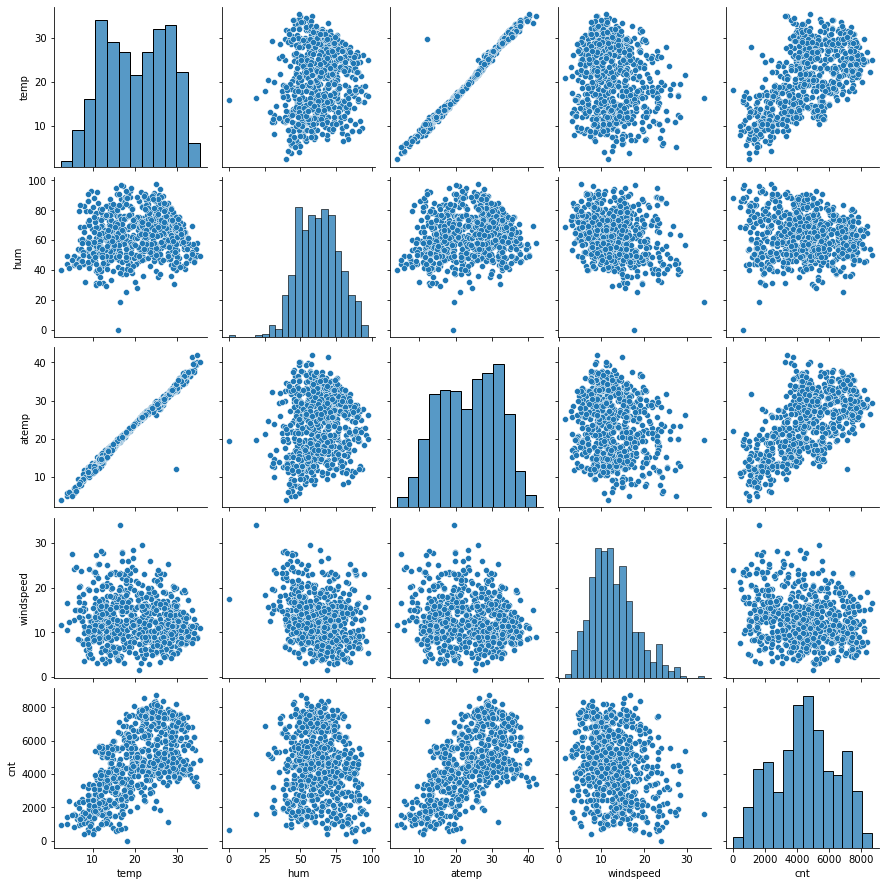

In [40]:
## Pairplot between numeric variables 
df_bike_num=df_bike[['temp', 'hum','atemp','windspeed','cnt']]
sns.pairplot(df_bike_num)
plt.show()

###### Inference
There is almost a linear relationship between 'atemp' and 'temp'. They might be correlated with each other and so we need to check the same.
Checking correlation coefficient for better understanding

<AxesSubplot:>

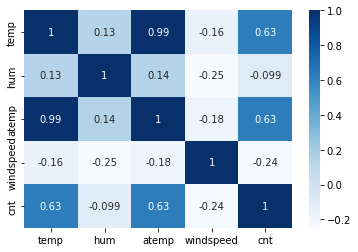

In [41]:
sns.heatmap(df_bike_num.corr(), annot=True, cmap='Blues')

- atemp and temp are linearly related and therefore both cannot be used at the same time to avoid multicolinearity. 

### Data Preparation

#### Creating Dummy Variables

In [107]:
weekday = pd.get_dummies(df_bike['weekday'], drop_first=True)
weekday.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,0,1
3,0,0,0,1,0,0
4,0,0,0,0,0,0


In [108]:
month= pd.get_dummies(df_bike['mnth'], drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [109]:
weather= pd.get_dummies(df_bike['weathersit'], drop_first=True)
weather.head()

,Light_rainsnow,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [110]:
season= pd.get_dummies(df_bike['season'], drop_first=True)
season.head()

,S2_Summer,S3_Fall,S4_Winter
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


###### Merging dataset

In [111]:
bike=pd.concat([df_bike, season, month, weather, weekday], axis=1)
bike.shape

(730, 34)

In [47]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   hum             730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  S2_Summer       730 non-null    uint8  
 13  S3_Fall         730 non-null    uint8  
 14  S4_Winter       730 non-null    uint8  
 15  Aug             730 non-null    uint8  
 16  Dec             730 non-null    uint8  
 17  Feb             730 non-null    uin

###### Dropping unnecessary columns

Since we have generated dummy variables for catagorical columns season, mnth, weathersit and weekday, we can drop those and move forward with our model

In [112]:
bike.drop(['season','mnth','weathersit','weekday'], axis=1, inplace=True)
bike.shape

(730, 30)

In [49]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   S2_Summer       730 non-null    uint8  
 9   S3_Fall         730 non-null    uint8  
 10  S4_Winter       730 non-null    uint8  
 11  Aug             730 non-null    uint8  
 12  Dec             730 non-null    uint8  
 13  Feb             730 non-null    uint8  
 14  Jan             730 non-null    uint8  
 15  Jul             730 non-null    uint8  
 16  Jun             730 non-null    uint8  
 17  Mar             730 non-null    uin

### Creating Train & Test Dataset

In [113]:
np.random.seed(0)
bike_train, bike_test= train_test_split(bike, train_size=0.7, random_state=334)

In [114]:
# checking the train & test dataset
bike_train.shape

(510, 30)

In [52]:
bike_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_Summer,S3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.513725,0.023529,0.701961,20.058165,23.473934,62.965819,12.839651,4493.764706,0.262745,0.237255,...,0.086275,0.080392,0.037255,0.350980,0.141176,0.145098,0.131373,0.137255,0.164706,0.143137
std,0.500302,0.151726,0.457846,7.352419,7.985009,14.806840,5.202800,1995.139048,0.440557,0.425818,...,0.281045,0.272166,0.189572,0.477745,0.348545,0.352545,0.338139,0.344454,0.371279,0.350557
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.042500,16.926163,51.552100,8.959307,3017.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,19.850847,23.594800,63.625000,12.041575,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.180222,29.822675,73.525850,15.781029,6050.500000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.781653,42.044800,97.250000,34.000021,8555.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [115]:
bike_test.shape

(220, 30)

In [54]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_Summer,S3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.468182,0.040909,0.663636,20.924522,24.311401,62.300045,12.587365,4541.022727,0.227273,0.304545,...,0.081818,0.086364,0.009091,0.304545,0.150000,0.136364,0.168182,0.154545,0.095455,0.140909
std,0.500125,0.198531,0.473542,7.836500,8.511027,12.841188,5.187211,1795.398066,0.420026,0.461264,...,0.274713,0.281541,0.095128,0.461264,0.357886,0.343957,0.374881,0.362295,0.294512,0.348721
min,0.000000,0.000000,0.000000,3.993043,5.896500,29.000000,2.834381,506.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.572712,16.295362,53.385425,9.230925,3384.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,21.388347,25.568125,61.458350,12.313360,4575.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,28.238760,31.976275,70.979200,15.260624,5726.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,40.245650,94.958300,29.584721,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The dataset is now split into 70% & 30% as Train & Test respectively. Train set contains 510 rows while test set contains 220 rows

###### Scaling the Train dataset dataset

In [116]:
scaler=MinMaxScaler()

In [117]:
# Applying scaler to Numerical variables (excluding dummy variables and yes/no variables)
num = ['temp','atemp','hum','windspeed','cnt']
bike_train[num] = scaler.fit_transform(bike_train[num])

In [57]:
bike_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_Summer,S3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
581,1,0,1,0.899689,0.855850,0.670951,0.552557,0.637759,0,1,...,0,0,0,0,1,0,0,0,0,0
433,1,0,0,0.289368,0.260817,0.360326,0.419234,0.480019,0,0,...,0,0,0,0,0,0,1,0,0,0
525,1,0,1,0.845837,0.767166,0.553556,0.229511,0.770655,1,0,...,0,0,0,0,1,0,0,0,0,0
218,0,0,1,0.865899,0.835128,0.774208,0.369214,0.440994,0,1,...,0,0,0,0,0,0,0,0,1,0
110,0,0,0,0.506887,0.492005,0.418594,0.624375,0.488339,1,0,...,0,0,0,0,0,1,0,0,0,0


In [58]:
bike_train[['cnt','yr','temp','atemp','hum','windspeed']].corr()

,cnt,yr,temp,atemp,hum,windspeed
cnt,1.000000,0.576631,0.635562,0.643370,-0.129740,-0.232389
yr,0.576631,1.000000,0.074548,0.074661,-0.119596,-0.009733
temp,0.635562,0.074548,1.000000,0.996345,0.124979,-0.151402
atemp,0.643370,0.074661,0.996345,1.000000,0.136523,-0.176107
hum,-0.129740,-0.119596,0.124979,0.136523,1.000000,-0.216821
windspeed,-0.232389,-0.009733,-0.151402,-0.176107,-0.216821,1.000000


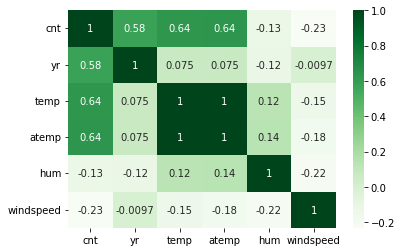

In [59]:
sns.heatmap(bike_train[['cnt','yr','temp','atemp','hum','windspeed']].corr(), annot=True, cmap='Greens')
plt.show()

In [60]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 581 to 130
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              510 non-null    int64  
 1   holiday         510 non-null    int64  
 2   workingday      510 non-null    int64  
 3   temp            510 non-null    float64
 4   atemp           510 non-null    float64
 5   hum             510 non-null    float64
 6   windspeed       510 non-null    float64
 7   cnt             510 non-null    float64
 8   S2_Summer       510 non-null    uint8  
 9   S3_Fall         510 non-null    uint8  
 10  S4_Winter       510 non-null    uint8  
 11  Aug             510 non-null    uint8  
 12  Dec             510 non-null    uint8  
 13  Feb             510 non-null    uint8  
 14  Jan             510 non-null    uint8  
 15  Jul             510 non-null    uint8  
 16  Jun             510 non-null    uint8  
 17  Mar             510 non-null    u

## Linear Model 

In [118]:
y_train=bike_train.pop('cnt')
x_train=bike_train

We will be using Recursive Feature Elimination(RFE), using the Linear Regression function from Scikit Learn.
A mixed approach involving RFE and Manual method to develop a model is used ahead

Currently we have 29 variables in the x train set, We will be starting with the top 15 variables to consider for the model

In [119]:
lm= LinearRegression()
lm.fit(x_train, y_train)
rfe=RFE(lm,15)
rfe=rf.fit(x_train,y_train)

In [120]:
list(zip(x_train.columns,rf.support_,rf.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 11),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('S2_Summer', True, 1),
 ('S3_Fall', True, 1),
 ('S4_Winter', True, 1),
 ('Aug', False, 4),
 ('Dec', False, 2),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 14),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 15),
 ('Tuesday', False, 8),
 ('Wednesday', False, 10)]

In [121]:
col1=x_train.columns[rfe.support_]
col1

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'S2_Summer',
       'S3_Fall', 'S4_Winter', 'Jul', 'Sep', 'Light_rainsnow', 'Misty',
       'Saturday', 'Sunday'],
      dtype='object')

In [122]:
x_train.columns[~rfe.support_]

Index(['temp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'Monday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [123]:
x_train_rfe=x_train[col1]

Variance Inflation Factor(VIF):  It is used to measure the amount of collinearity in the variables of multiple regression. It is important for statistical significance of a model that Large VIF should be avoided.



In [124]:
# Calculate VIF 
vif=pd.DataFrame()
x=x_train_rf
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
4,hum,35.98
2,workingday,30.57
3,atemp,22.91
5,windspeed,6.71
13,Saturday,6.59
7,S3_Fall,6.17
14,Sunday,6.14
6,S2_Summer,3.59
8,S4_Winter,2.61
12,Misty,2.52


The VIF for 'hum', 'workingday' and 'atemp' are too high. Moving ahead with stats model

In [125]:
### Defining a function for VIF calculation 
def vif_cal(df):
    vif=pd.DataFrame()
    x=df
    vif['Features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return (vif)

##### Building Model using statsmodel, for detailed statistics

##### Model 1

In [126]:
x_train_m1= sm.add_constant(x_train_rfe)

In [127]:
lm=sm.OLS(y_train, x_train_m1).fit()

In [128]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     205.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.86e-201
Time:                        16:40:55   Log-Likelihood:                 522.70
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     494   BIC:                            -945.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.4117      0.098      4.

In [90]:
vif_cal(x_train_m1)

,Features,VIF
0,const,625.38
3,workingday,119.89
14,Saturday,69.97
15,Sunday,66.17
2,holiday,12.02
8,S3_Fall,4.72
4,atemp,3.30
7,S2_Summer,2.65
5,hum,1.99
9,S4_Winter,1.98


 The R2 and Adjusted R2 values are quite great (0.862 and 0.858 respectively)
 The VIF for workingday is too high and statistical significance is low as p-value >0.01. 
 Dropping the workingday variable to build the next model

##### Model 2

In [158]:
x_train_lm2=x_train_rfe.drop('workingday', axis=1)
x_train_m2=sm.add_constant(x_train_lm2)
lm2= sm.OLS(y_train, x_train_m2).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     218.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.24e-201
Time:                        17:51:43   Log-Likelihood:                 520.45
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     495   BIC:                            -947.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2153      0.027      7.

In [130]:
vif_cal(x_train_m2)

,Features,VIF
0,const,47.52
7,S3_Fall,4.71
3,atemp,3.30
6,S2_Summer,2.65
4,hum,1.99
8,S4_Winter,1.97
12,Misty,1.65
9,Jul,1.58
11,Light_rainsnow,1.36
10,Sep,1.28


In this we can see that 'Saturday' has a low VIF but the p-value is very high
while we have S3_Fall with high VIF but low p-value

For further enhancing the model, lets drop 'Saturday'

###### Model 3

In [159]:
x_train_lm3=x_train_lm2.drop(['Saturday'],axis=1)
x_train_m3 = sm.add_constant(x_train_lm3)
lm3=sm.OLS(y_train, x_train_m3).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.84e-202
Time:                        17:52:13   Log-Likelihood:                 520.20
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     496   BIC:                            -953.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2180      0.027      8.

In [132]:
vif_cal(x_train_m3)

,Features,VIF
0,const,46.55
7,S3_Fall,4.71
3,atemp,3.29
6,S2_Summer,2.64
8,S4_Winter,1.97
4,hum,1.96
12,Misty,1.63
9,Jul,1.58
11,Light_rainsnow,1.36
10,Sep,1.28


Adjusted R2 value is 0.857 and all the variables are having low p-value(i.e<0.01) except Sunday.
The VIF for S3_Fall is high amongst the variables, checking the next model without S3_fall

##### Model 4

In [161]:
x_train_lm4= x_train_lm3.drop(['S3_Fall'], axis=1)

In [162]:
x_train_m4 = sm.add_constant(x_train_lm4)
lm4=sm.OLS(y_train, x_train_m4).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     241.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.82e-198
Time:                        17:52:57   Log-Likelihood:                 507.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     497   BIC:                            -934.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2093      0.027      7.

In [146]:
vif_cal(x_train_m4)

,Features,VIF
0,const,46.35
4,hum,1.96
3,atemp,1.63
11,Misty,1.63
8,Jul,1.50
6,S2_Summer,1.41
10,Light_rainsnow,1.35
7,S4_Winter,1.29
5,windspeed,1.20
9,Sep,1.18


'Sunday' has a p-value>0.01 and therefore we can eliminate it from the model

##### Model 5

In [167]:
x_train_lm5=x_train_lm4.drop(['Sunday'],axis=1)

In [170]:
x_train_m5 = sm.add_constant(x_train_lm5)
lm5=sm.OLS(y_train, x_train_m5).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     260.2
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.09e-198
Time:                        17:58:55   Log-Likelihood:                 504.82
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     498   BIC:                            -934.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2180      0.027      8.

In [165]:
vif_cal(x_train_m5)

,Features,VIF
0,const,45.56
4,hum,1.94
3,atemp,1.63
11,Misty,1.62
8,Jul,1.50
6,S2_Summer,1.40
10,Light_rainsnow,1.35
7,S4_Winter,1.29
5,windspeed,1.20
9,Sep,1.18


All the variables now have a low p-value (<0.01) and a low VIF (<2). Next we will check the parameters and make interpretations using the model

In [153]:
## Checking the parameters
lm5.params

const             0.218042
yr                0.238489
holiday          -0.120975
atemp             0.666777
hum              -0.217072
windspeed        -0.144536
S2_Summer         0.081116
S4_Winter         0.138463
Jul              -0.048355
Sep               0.106630
Light_rainsnow   -0.220797
Misty            -0.046118
dtype: float64

## Model Interpretation

##### Hypothesis Testing

Null Hypothesis:       H0:B1=B2=...=Bn=0
Alternate Hypothesis:  H1: at least one Bi!=0

const             0.218042
yr                0.238489
holiday          -0.120975
atemp             0.666777
hum              -0.217072
windspeed        -0.144536
S2_Summer         0.081116
S4_Winter         0.138463
Jul              -0.048355
Sep               0.106630
Light_rainsnow   -0.220797
Misty            -0.046118

The coefficients are non-zero and Hence we Reject the Null Hypothesis

##### F-statistics
F-Statistics:       260.2
Prob(F-statistics): 2.09e-198

F- statistics is used for overall significance of the model, Higher F-statistics indicate more significant model.
- The F-statistics value of 260 and overall p value of '~0.0000' states that the model is significant overall

##### Predicited Model Equation

#### cnt = 0.218042 + (yr x 0.238489) - (holiday x 0.120975) + (atemp x 0.666777) - (hum x 0.217072) - (windspeed x 0.144536)+ (S2_Summer x 0.081116)+ (S4_Winter x 0.138463) - (Jul x 0.048355) + (Sep x 0.106630) - (Light_rainsnow x 0.220797) - (Misty x 0.046118)

### Interpretation

###### const: 
Constant value of 0.218042 represents that in the absence of all other variables i.e. x1=x2=.....xn=0, The bike rental increases by 0.218042 units

###### yr: 
A positive oefficient of 0.238489 indicates a positive growth of bike count over the years. Each year there will be a rise in number of bike with a factor of 0.238489

###### holiday:
A negative coefficient value of -0.120975 indicates a decreasing impact on bike count. If there is a holiday the bike cnt will decrease by 0.120975 than a workingday.

###### atemp:
Coefficient value of 0.666777 suggests that for a unit increase in temprature increases the bike count by 0.666777

###### hum:
Negative coefficient refers to a decrease of 0.217072 for unit increase in huidity

###### windspeed:
(-0.144536) Negative coefficient value suggest that there is 0.144536 times decrease in the bike count for a unit increase in windspeed

###### S2_summer:
coefficient value of 0.081116 indicates bike count increase in Summer.

###### S4_Winter:
coefficient value 0.138463 indicates increase in bike count for Winter

###### Jul:
For the July month negative coefficient value -0.048355 suggest a decrease in bike count

###### Sep:
For September month the bike count increases by a factor of 0.106630

###### Light_rainsnow:
For the weathersituation as light rainsnow there is a drop in bike count by 0.220797

###### Misty:
Coefficient value of -0.046118 is indicative of decrease in bike count by the given amount for Misty weather

## Model Validation

In this step we will validate the Linear Regression Model and its ssumptions:
- Linear relationship
- Homoscedasticity
- Absence of Multicollinearity
- Independence of residuals
- Normality of Errors

##### Linear Relationship

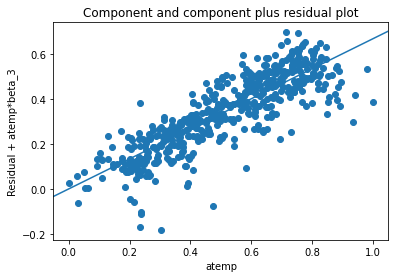

In [154]:
sm.graphics.plot_ccpr(lm5, 'atemp')
plt.show()

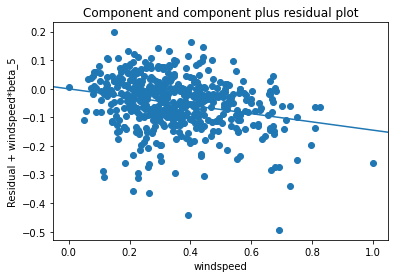

In [156]:
sm.graphics.plot_ccpr(lm5, 'windspeed')
plt.show()


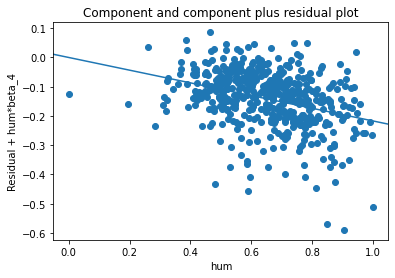

In [157]:
sm.graphics.plot_ccpr(lm5, 'hum')
plt.show()

##### Homoscedasticity

In [181]:
y_train_pred = lm5.predict(x_train_m5)
y_train_pred

581    0.801685
433    0.491628
525    0.895843
218    0.553463
110    0.446107
         ...   
601    0.657430
91     0.262098
584    0.784113
162    0.584006
130    0.521879
Length: 510, dtype: float64

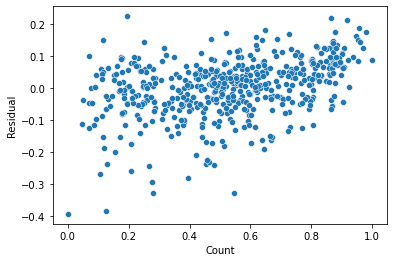

In [188]:
residual= y_train-y_train_pred
sns.scatterplot(y_train,(y_train-y_train_pred))
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

No pattern can be seen int the error terms and hence homoscedacity is present


### Absence of Multicolinearity

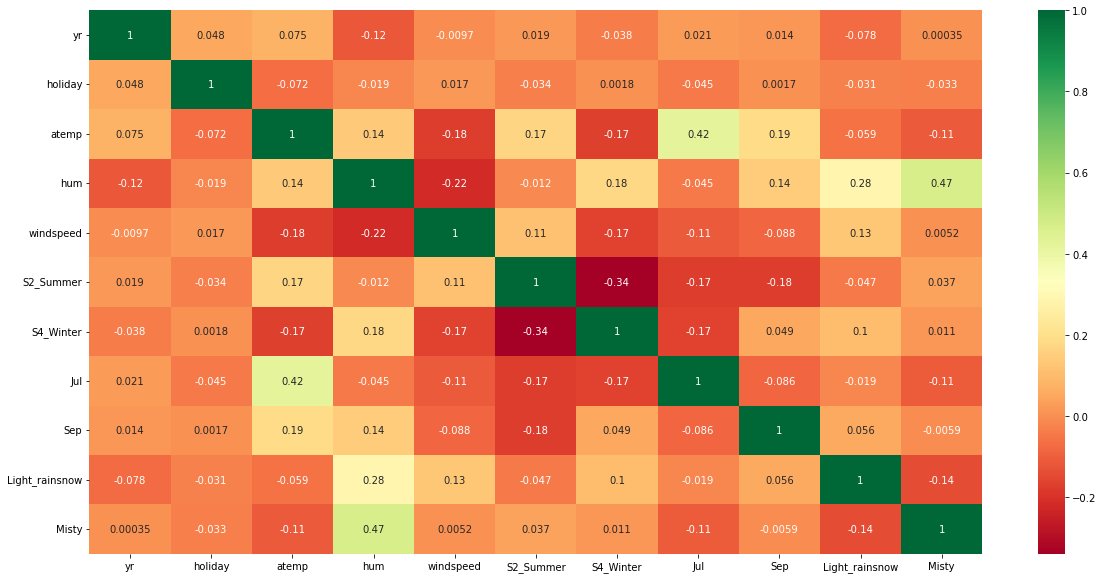

In [176]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train_lm5.corr(), annot=True, cmap='RdYlGn')
plt.show()

There is no strong correlation between the variables, also all VIF values are less than 5. Hence we can say that multicolinearity is absent.

In [173]:
lm5.params

const             0.218042
yr                0.238489
holiday          -0.120975
atemp             0.666777
hum              -0.217072
windspeed        -0.144536
S2_Summer         0.081116
S4_Winter         0.138463
Jul              -0.048355
Sep               0.106630
Light_rainsnow   -0.220797
Misty            -0.046118
dtype: float64

##### Normality of Error

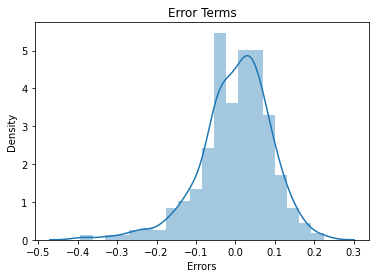

In [194]:
res= y_train- y_train_pred

# plotting histogram
sns.distplot((res), bins=20)
plt.title('Error Terms')
plt.xlabel('Errors')
plt.show()

The histogram shows a normal distribution, Hence we can conclude that the error terms are normally distributed

### Predictions Using Final Model

###### Scaling bike_test dataframe

Scaling is done for numerical columns only. We donot use test set to lean anything, we therefore use transform for scaling.

In [196]:
num= ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_test[num]=scaler.transform(bike_test[num])
bike_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,S2_Summer,S3_Fall,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
472,1,0,1,0.512166,0.496135,0.585262,0.299998,0.509200,1,0,...,0,0,0,1,0,0,0,1,0,0
357,0,0,1,0.308374,0.289006,0.557841,0.346160,0.115903,0,0,...,0,0,0,0,1,0,0,0,0,0
613,1,0,1,0.807824,0.756418,0.833334,0.247447,0.724364,0,1,...,0,1,0,1,0,0,0,0,0,0
536,1,0,1,0.946148,0.884023,0.583976,0.198724,0.689441,0,1,...,0,0,0,0,0,0,0,0,0,0
681,1,0,1,0.360114,0.320487,0.681663,0.658984,0.477206,0,0,...,0,0,0,1,0,0,0,0,0,1


In [202]:
bike_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,S2_Summer,S3_Fall,S4_Winter,...,Oct,Sep,Light_rainsnow,Misty,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.468182,0.040909,0.663636,0.571746,0.534450,0.640617,0.341145,0.227273,0.304545,0.240909,...,0.081818,0.086364,0.009091,0.304545,0.150000,0.136364,0.168182,0.154545,0.095455,0.140909
std,0.500125,0.198531,0.473542,0.242186,0.223437,0.132043,0.159608,0.420026,0.461264,0.428610,...,0.274713,0.281541,0.095128,0.461264,0.357886,0.343957,0.374881,0.362295,0.294512,0.348721
min,0.000000,0.000000,0.000000,0.048480,0.051010,0.298201,0.041051,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.344539,0.324008,0.548950,0.237869,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.586081,0.567443,0.631962,0.332714,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.797792,0.735674,0.729863,0.423399,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.016896,0.952767,0.976435,0.864144,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [197]:
# y_test
y_test = bike_test.pop('cnt')
# x_test
x_test = bike_test

In [217]:
# Selecting variables that are part of final model
col=x_train_m5.columns
x_test_m=sm.add_constant(x_test)
x_test_m.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'S2_Summer', 'S3_Fall', 'S4_Winter', 'Aug', 'Dec', 'Feb',
       'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Light_rainsnow', 'Misty', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday'],
      dtype='object')

In [218]:
x_test_m = x_test_m[col]
x_test_m.head()

,const,yr,holiday,atemp,hum,windspeed,S2_Summer,S4_Winter,Jul,Sep,Light_rainsnow,Misty
472,1.0,1,0,0.496135,0.585262,0.299998,1,0,0,0,0,1
357,1.0,0,0,0.289006,0.557841,0.346160,0,0,0,0,0,0
613,1.0,1,0,0.756418,0.833334,0.247447,0,0,0,1,0,1
536,1.0,1,0,0.884023,0.583976,0.198724,0,0,0,0,0,0
681,1.0,1,0,0.320487,0.681663,0.658984,0,1,0,0,0,1


In [219]:
x_test_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 472 to 160
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   holiday         220 non-null    int64  
 3   atemp           220 non-null    float64
 4   hum             220 non-null    float64
 5   windspeed       220 non-null    float64
 6   S2_Summer       220 non-null    uint8  
 7   S4_Winter       220 non-null    uint8  
 8   Jul             220 non-null    uint8  
 9   Sep             220 non-null    uint8  
 10  Light_rainsnow  220 non-null    uint8  
 11  Misty           220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(6)
memory usage: 13.3 KB


In [220]:
### Predicting the values using final Model

y_pred= lm5.predict(x_test_m)

#### Model Evaluation

Text(0, 0.5, 'y_pred')

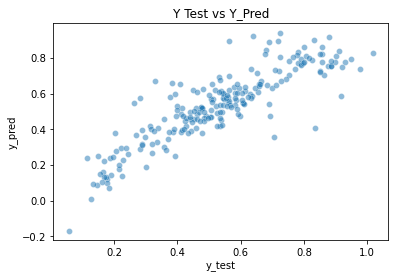

In [222]:
sns.scatterplot(y_test, y_pred, alpha=0.5)
plt.title('Y Test vs Y_Pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [223]:
## R2 calculation for test dataframe
r2= round(r2_score(y_test, y_pred),4)
r2

0.7456

##### Adjusted R2 calculation for test dataset

In [224]:
# number of rows in test dataset
n= x_test.shape[0]
# number of features (predictors,p) shape along axis 1
p= x_test.shape[1]

# Adjusted R-square 
adj_r2= round(1-((1-r2)*(n-1)/(n-p-1)),4)
adj_r2

0.7068

### Model Train & Test statistics
    Measurement  	Train Dataset	Test Dataset
    R2 Value	           85.2%	  74.56%
    Adjusted R2 Value	   84.9%	  70.68%

It seems to be a good model and can be used for other datasets

In [226]:
## Root Mean Square Error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.1059

In [227]:
## Mean Absolute Error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0755

RMSE and MAE values are 0.1059 and 0.0755 respectively, indicating a good fit

## Model Summary

As per the model the top predictors variables that influence the bike count and booking are:

1. atemp: coefficient '0.666777' indicates that temp has significant impact on bike rentals 
2. yr: coefficient '0.238489' indicates yearwise increase in number
3. hum: coefficient '-0.217072' shows that people reduce while renting out bikes

It is recommended to give high importnce to these variables while planning. High temp and good weather impact the bike rental positively, it is recommended that bike availability and promotions to be increased during the summer months.